# Ex2: Correlation

#### Cho dữ liệu baseball trong tập tin Master.csv. 
- Đọc tập tin vào df => tạo hw từ df chỉ lấy 2 cột height và weight. Bỏ các dòng có dữ liệu null
- Vẽ biểu đồ để xem xét tính tương quan.
- Vẽ boxplot để tìm outliers. Loại bỏ các outliers.
- Tính correlation của height và weight theo 2 cách Pearson và Spearsman

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = data = pd.read_csv("Master.csv")
df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [3]:
hw = df[["weight", "height"]]
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
weight    17975 non-null float64
height    18041 non-null float64
dtypes: float64(2)
memory usage: 294.5 KB


In [4]:
hw = hw.dropna()
hw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18845
Data columns (total 2 columns):
weight    17918 non-null float64
height    17918 non-null float64
dtypes: float64(2)
memory usage: 420.0 KB


In [5]:
hw.head()

,weight,height
0,220.0,75.0
1,180.0,72.0
2,190.0,75.0
3,190.0,75.0
4,184.0,73.0


In [6]:
import seaborn as sns 

<Figure size 576x576 with 0 Axes>

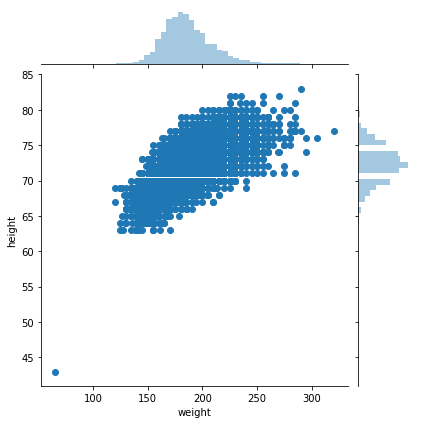

In [7]:
plt.figure(figsize=(8,8))
sns.jointplot(x='weight', y = 'height', data = hw)
plt.show()

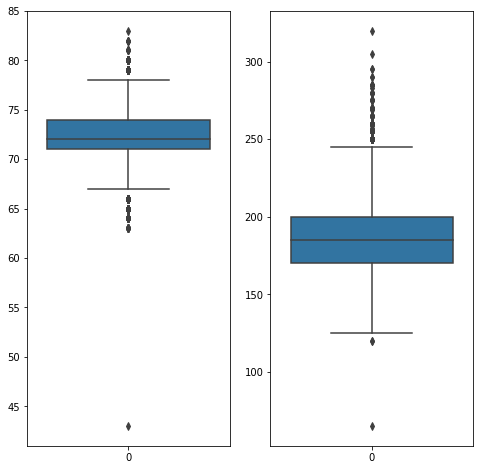

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data = hw.height)
plt.subplot(1,2,2)
sns.boxplot(data = hw.weight)
plt.show()

In [9]:
from scipy import stats 

In [10]:
percentiles = np.array([25, 75])
x_h = np.percentile(hw.height, percentiles)
IQR_h = stats.iqr(hw.height)
x_h, IQR_h

(array([71., 74.]), 3.0)

In [11]:
x_w = np.percentile(hw.weight, percentiles)
IQR_w = stats.iqr(hw.weight)
x_w, IQR_w

(array([170., 200.]), 30.0)

In [12]:
x_w[1] + 1.5*IQR_w

245.0

In [13]:
hw.weight.max()

320.0

In [14]:
hw = hw[(hw.height >= (x_h[0] - 1.5*IQR_h)) & (hw.height <= (x_h[1] + 1.5*IQR_h))]
hw = hw[(hw.weight >= (x_w[0] - 1.5*IQR_w)) & (hw.weight <= (x_w[1] + 1.5*IQR_w))]
hw.shape

(17374, 2)

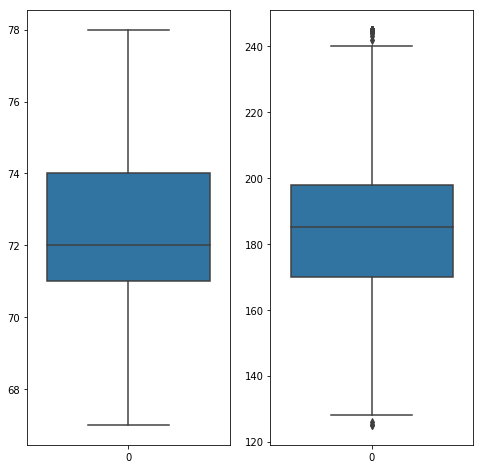

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data = hw.height)
plt.subplot(1,2,2)
sns.boxplot(data = hw.weight)
plt.show()

In [16]:
# Homogeneity of variances
stats.levene(hw['weight'], hw['height'])

LeveneResult(statistic=21417.587436175472, pvalue=0.0)

In [17]:
# p value less than .05 indicates a violation of the assumption

In [18]:
# Pandas correlation: default is Pearson
hw['weight'].corr(hw['height'])

0.6708146812914392

In [19]:
# Spearman's correlation
hw['weight'].corr(hw['height'], method= 'spearman')

0.676640911865143

#### Có thể thấy rằng hai phương pháp khác nhau để tính toán mức độ tương quan giữa các biến cho kết quả khác nhau. Cả hai phương pháp đều cho thấy mức độ tương quan trung bình giữa height và weight. 